# Loan-Approval-Prediction

***Problem Definition***
Loan approval prediction poses a unique challenge due to the multifaceted nature of the factors 
that influence an applicant’s ability to repay a loan. Traditionally, loan officers have relied
on a set of criteria—such as credit score, income level, age, and past loan repayment history—when 
determining the risk associated with lending money to an individual. However, this process often 
lacks objectivity and is subject to human bias, where subjective interpretations of the data can
lead to unfair or inconsistent decisions. Additionally, the sheer volume of loan applications in
large financial institutions makes it increasingly difficult for human evaluators to maintain accuracy and efficiency.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
df = pd.read_csv("loan_approval_dataset.csv")
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [9]:
# Display basic information
print("Dataset Overview:")
print(df.head())
print(df.info())
print(df.describe())

Dataset Overview:
   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0       

In [10]:
# Cleaning column names
df.columns = df.columns.str.strip().str.lower()

In [11]:
# Verify column names
print("Columns in dataset:", df.columns)

Columns in dataset: Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')


In [12]:
# Identify the target column
possible_target_columns = ['loan_status', 'loan_approval_status']
target_column = None
for col in possible_target_columns:
    if col in df.columns:
        target_column = col
        break

if target_column is None:
    raise KeyError("Target column not found in dataset! Available columns: " + str(df.columns))

In [18]:
# Handling missing values
imputer = SimpleImputer(strategy='most_frequent')
df[df.columns] = imputer.fit_transform(df)


In [19]:
# Encoding categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [20]:
# Feature-target split
X = df.drop(columns=[target_column])
y = df[target_column]

In [21]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
# Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
# Predictions
y_pred = model.predict(X_test)

In [28]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.98
Confusion Matrix:
[[528   8]
 [  9 309]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       536
           1       0.97      0.97      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



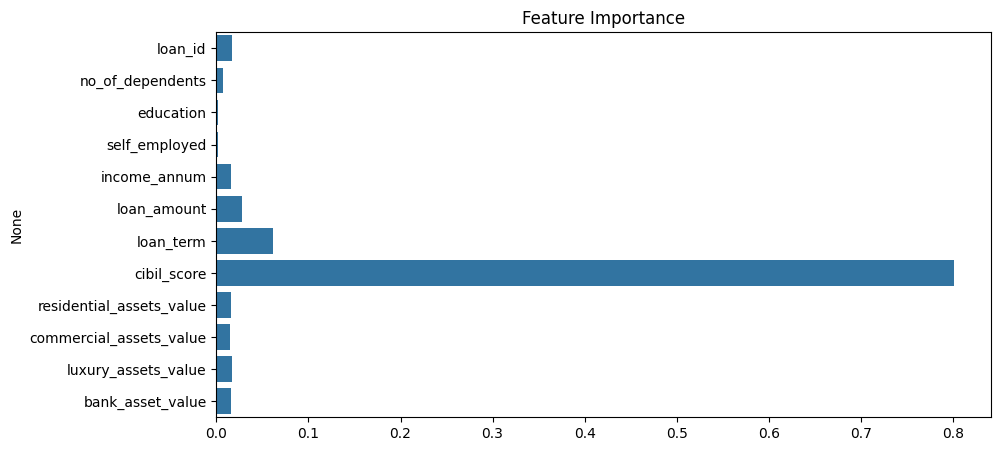

In [42]:
# Feature Importance
feature_importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=feature_names)
plt.title("Feature Importance")
plt.show()

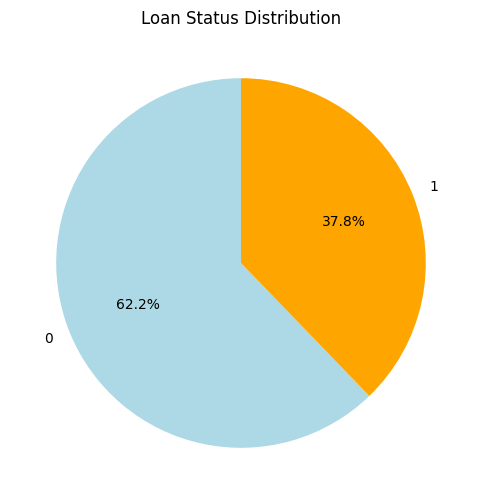

In [43]:
# Loan Status Distribution
plt.figure(figsize=(6, 6))
df[target_column].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'orange'], startangle=90)
plt.title("Loan Status Distribution")
plt.ylabel('')
plt.show()

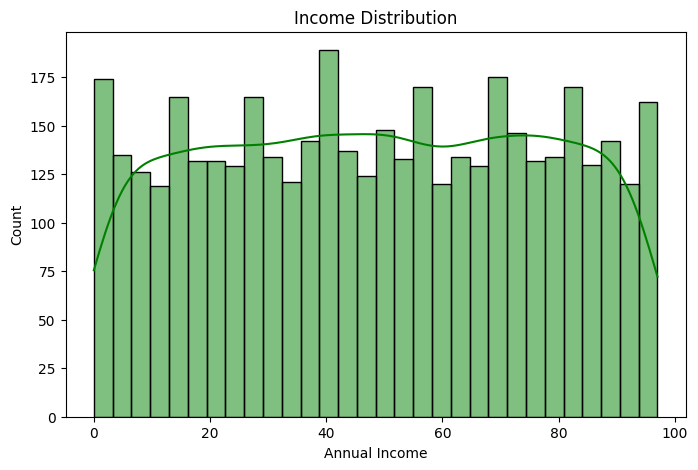

In [31]:
# Income Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['income_annum'], bins=30, kde=True, color='green')
plt.title("Income Distribution")
plt.xlabel("Annual Income")
plt.show()

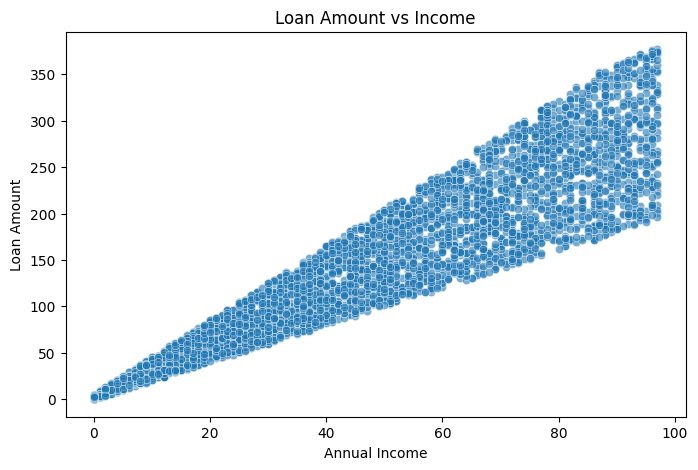

In [32]:
# Loan Amount vs Income
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['income_annum'], y=df['loan_amount'], alpha=0.6)
plt.title("Loan Amount vs Income")
plt.xlabel("Annual Income")
plt.ylabel("Loan Amount")
plt.show()

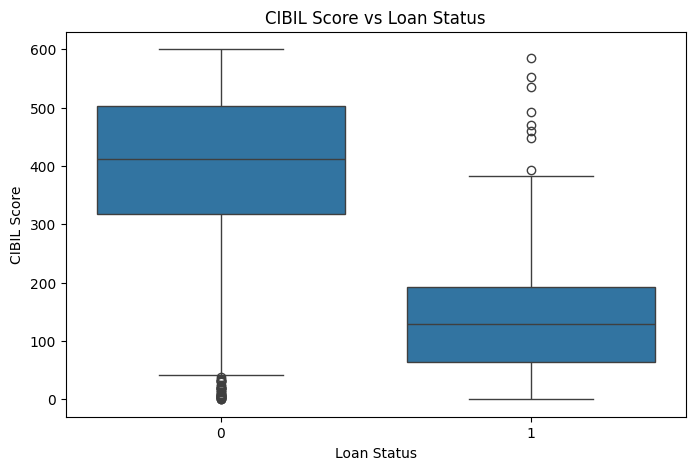

In [33]:
# CIBIL Score vs Loan Status
plt.figure(figsize=(8, 5))
sns.boxplot(x=df[target_column], y=df['cibil_score'])
plt.title("CIBIL Score vs Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("CIBIL Score")
plt.show()

In [40]:
import os
os.makedirs('/mnt/data/', exist_ok=True)

joblib.dump(model, '/mnt/data/loan_approval_model.pkl')
joblib.dump(scaler, '/mnt/data/loan_scaler.pkl')
joblib.dump(label_encoders, '/mnt/data/loan_label_encoders.pkl')


['/mnt/data/loan_label_encoders.pkl']

# Insights and Summary
***1. Feature Importance Analysis***

The Random Forest feature importance chart indicates which variables contribute most to loan approval predictions.
Key factors affecting loan approval include CIBIL Score, Income, Loan Amount, and Bank Asset Value.

***2. Loan Status Distribution***

The pie chart shows the proportion of approved vs. rejected loans.
If approval rates are significantly lower, lenders may have strict criteria, or applicant profiles may not be strong enough.

***3. Income Distribution***

The histogram of annual income suggests the general income distribution of loan applicants.
If the distribution is skewed, the dataset might have more low-income or high-income applicants.

***4. Loan Amount vs Income***

The scatter plot indicates how loan amounts relate to annual income.
A clear trend would suggest a proportional relationship, whereas a scattered distribution might indicate varied approval criteria.

***5. CIBIL Score vs Loan Status***

The box plot reveals the distribution of CIBIL scores for approved vs. rejected loans.
If approved loans consistently have high CIBIL scores, it confirms that creditworthiness significantly impacts approval decisions.